In [1]:



import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/accident.csv")

In [ ]:
accident_df_2020 = df[df['accident_year'] == 2020]
accident_df_2020.head()

In [ ]:
accident_df_2020.isna().sum()

In [ ]:
accident_df_2020.dropna(inplace=True)

In [ ]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
accident_2020_df = accident_df_2020.copy()

# Convert 'date' column to datetime with the correct format
accident_2020_df['date'] = pd.to_datetime(accident_2020_df['date'], format='%d/%m/%Y')

# Extract day, month, and year into new columns
accident_2020_df['Day'] = accident_2020_df['date'].dt.day
accident_2020_df['Month'] = accident_2020_df['date'].dt.month
accident_2020_df['Year'] = accident_2020_df['date'].dt.year
accident_2020_df["time"] = accident_2020_df["time"].astype("datetime64[ns]")
accident_2020_df.head()

In [7]:
# List of columns to fill "-1" with the mode
columns_to_fill = [
    'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions',
    'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
    'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag','local_authority_district'
]

# Iterate through each column and fill "-1" values with the mode
for column in columns_to_fill:
    mode_value = accident_2020_df[column].mode()[0]
    accident_2020_df[column] = accident_2020_df[column].replace(-1, mode_value)

# Check the changes
accident_2020_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Day,Month,Year
370153,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,0,0,1,3,2,E01004576,4,2,2020
370154,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,0,0,1,1,2,E01003034,27,4,2020
370155,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,2,0,0,1,1,2,E01004726,1,1,2020
370156,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,0,0,1,1,2,E01003617,1,1,2020
370157,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,1,0,0,1,1,2,E01004763,1,1,2020


## **Data Overview and Summary Statistics**

In [8]:
# Number of accidents
num_accidents = accident_2020_df.shape[0]

# Total number of vehicles involved
total_vehicles = accident_2020_df['number_of_vehicles'].sum()

# Total number of casualties
total_casualties = accident_2020_df['number_of_casualties'].sum()

print(f"Number of accidents: {num_accidents}")
print(f"Total number of vehicles involved: {total_vehicles}")
print(f"Total number of casualties: {total_casualties}")

Number of accidents: 91185
Total number of vehicles involved: 167348
Total number of casualties: 115567


In [9]:
# List of columns to analyze
columns_to_analyze = [
    'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions',
    'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
    'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag'
]

# Extract relevant columns into a new DataFrame
stats_df = accident_2020_df[columns_to_analyze]

# Calculate basic statistics
basic_stats = stats_df.describe()
basic_stats

,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000
mean,36.272633,3.935187,3.837221,3.049284,220.179942,0.354598,1.186917,2.065274,1.701947,1.398552,0.247168,0.182903,1.322948,1.415277,1.942249
std,13.889219,12.613675,0.945866,2.745852,913.618002,1.697452,2.445018,1.747550,1.845561,0.915241,1.317298,1.148524,0.467606,0.665444,0.233273
min,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,30.000000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,70.000000,99.000000,9.000000,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,2.000000,3.000000,2.000000


# **Temporal Analysis**

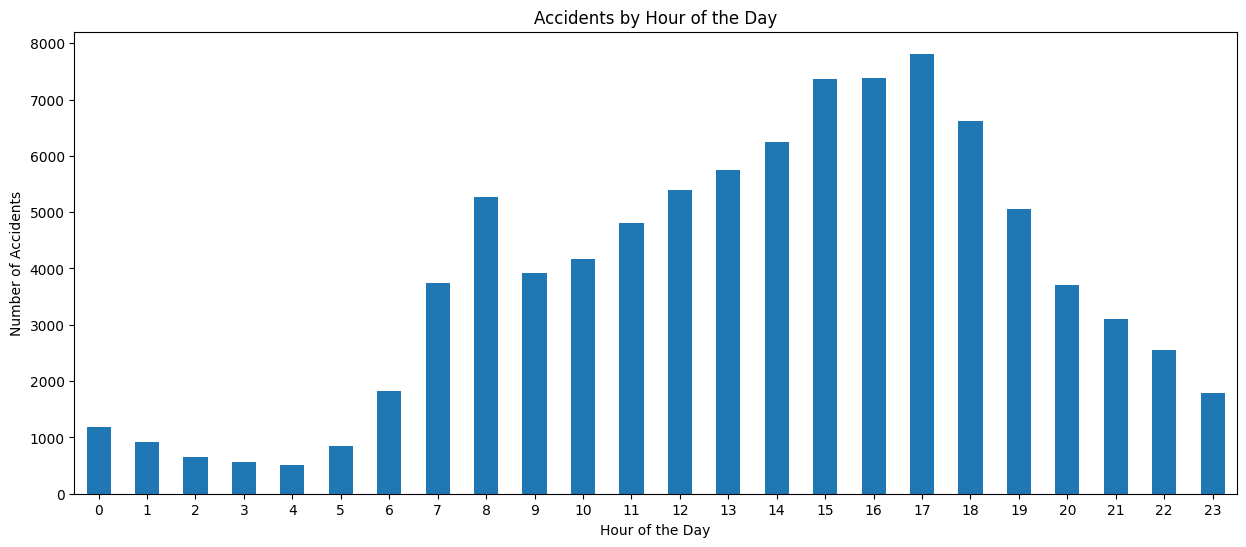

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract hour from the 'time' column
accident_2020_df['hour'] = accident_2020_df['time'].dt.hour

# Plot accidents by hour of the day
plt.figure(figsize=(15, 6))
accident_2020_df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

Analyzing the accident data by hour reveals significant patterns:

The peak time for accidents is 5 PM (17:00), accounting for approximately 8.57% of all accidents. This suggests a high risk during the evening rush hour, likely due to increased traffic volume as people commute home from work.
The hours 4 PM (16:00) and 3 PM (15:00) follow closely, each accounting for about 8.09% and 8.07% of accidents, respectively. This indicates a higher risk period starting from mid-afternoon into the early evening.
6 PM (18:00) also shows a significant number of accidents, making up 7.25% of the total. This further underscores the evening rush hour as a critical time for road safety.
The distribution gradually decreases through the late morning and early afternoon, with 2 PM (14:00), 1 PM (13:00), and 12 PM (12:00) each contributing 6.85%, 6.30%, and 5.92% respectively.
Notably, 8 AM (8:00) has a spike, representing 5.77% of accidents, likely correlating with the morning rush hour.
Accidents become less frequent late at night and early morning, with the lowest rates observed between 3 AM (3:00) and 4 AM (4:00), each below 1%.

This analysis highlights the critical hours for road safety, particularly during the morning and evening rush hours. Targeted interventions during these times, such as increased law enforcement presence, public awareness campaigns, and traffic management measures, could significantly reduce accident rates.

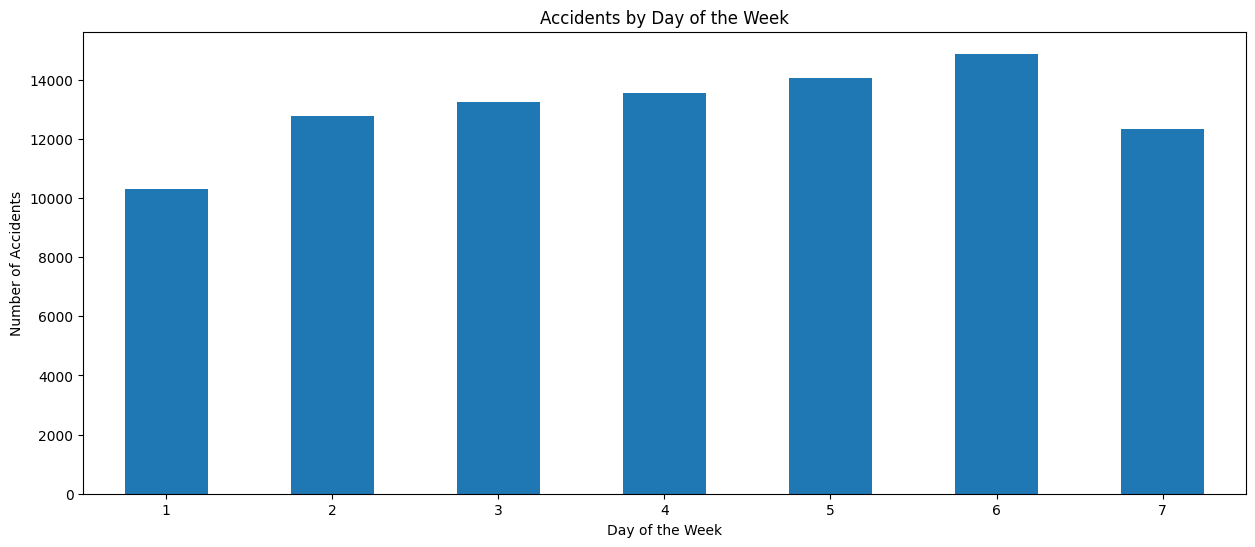

In [11]:
# Plot accidents by day of the week
plt.figure(figsize=(15, 6))
accident_2020_df['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

Saturday (day 6): 16.3%

Friday (day 5): 15.4%

Thursday (day 4): 14.9%

Wednesday (day 3): 14.5%

Tuesday (day 2): 14.0%

Sunday (day 7): 13.5%

Monday (day 1): 11.3%

This distribution indicates that the highest number of accidents occur on Saturdays, accounting for 16.3% of the total accidents. Fridays and Thursdays also see a significant share of accidents, with 15.4% and 14.9% respectively. Interestingly, Mondays have the lowest incidence of accidents at 11.3%.

Insight:
The higher frequency of accidents on weekends, particularly on Saturdays, suggests increased risk during this period, potentially due to higher traffic volumes, social activities, and possibly less vigilant driving behavior. The substantial number of accidents on Fridays and Thursdays might be associated with end-of-week fatigue or rush-hour traffic. In contrast, the lower accident rates on Mondays may reflect a more cautious start to the week or lower traffic volumes.

These insights highlight the importance of targeted road safety measures and awareness campaigns for weekends and the latter part of the week. Enhancing enforcement and promoting safe driving practices during these high-risk days could significantly reduce the overall accident rates. Further investigation into the specific causes and contexts of these accidents can lead to more effective and tailored interventions

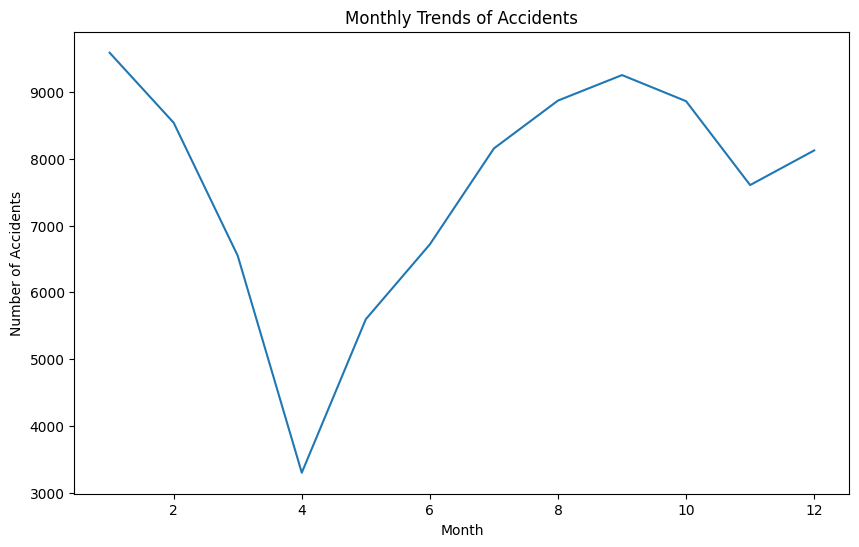

In [12]:
# Plot monthly trends
plt.figure(figsize=(10, 6))
accident_2020_df['Month'].value_counts().sort_index().plot()
plt.title('Monthly Trends of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

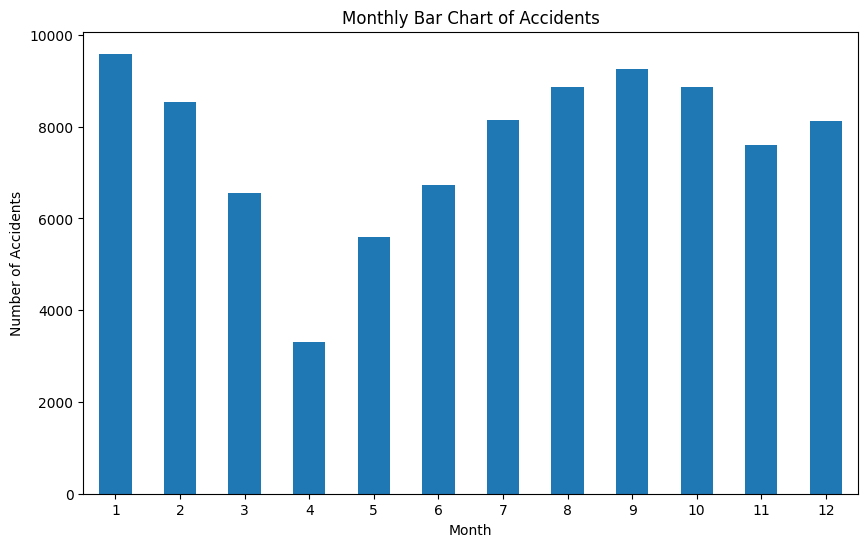

In [13]:
# Plot monthly trends
plt.figure(figsize=(10, 6))
accident_2020_df['Month'].value_counts().sort_index().plot(kind="bar")
plt.title('Monthly Bar Chart of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

January (Month 1) has the highest proportion of accidents at approximately 10.5%.

September (Month 9) follows closely with about 10.2% of accidents.

August (Month 8) and October (Month 10) also show notable proportions, around 9.7% each.

February (Month 2) accounts for approximately 9.4% of accidents.

July (Month 7) has around 8.9% of accidents.

December (Month 12) is close behind with about 8.9% of accidents.

November (Month 11) shows around 8.3%.

June (Month 6) has approximately 7.4% of accidents.

March (Month 3) accounts for about 7.2%.

May (Month 5) has around 6.1% of accidents.

April (Month 4) has the lowest proportion at approximately 3.6%.

Insight:

The analysis reveals that accident rates tend to be higher at the beginning and end of the year, with January and September being the peak months. This suggests that these months might be more hazardous due to factors such as weather conditions, increased holiday travel, or seasonal changes.

The drop in accident rates in April, compared to other months, might indicate a period of relatively lower traffic volume or improved road conditions.

Understanding these patterns can help in planning and implementing targeted road safety measures during peak months and investigating potential factors contributing to higher accident rates during these times. This could include enhanced road safety campaigns or traffic management strategies during high-risk periods.








In [14]:
accident_2020_df['Month'].value_counts(normalize=True)

Month
1     0.105182
9     0.101508
8     0.097319
10    0.097220
2     0.093678
7     0.089456
12    0.089127
11    0.083435
6     0.073696
3     0.071821
5     0.061392
4     0.036168
Name: proportion, dtype: float64

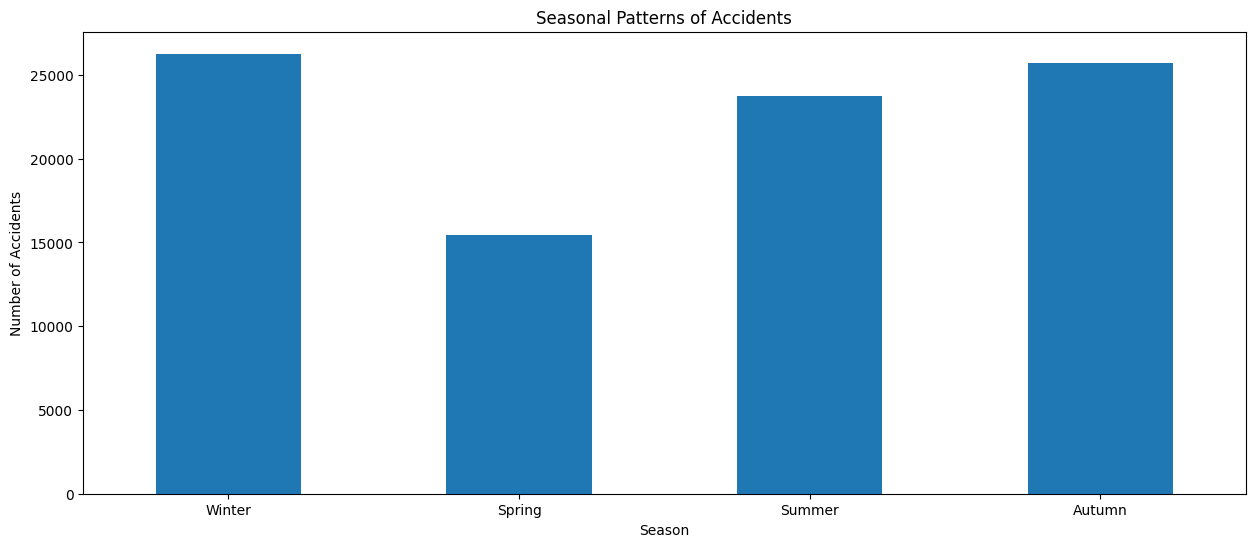

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of the DataFrame for safety
#df_copy = temporal_df.copy()

# Extract the season from the date
accident_2020_df['season'] = accident_2020_df['date'].apply(lambda x: (x.month % 12 + 3) // 3)

# Define the categories for seasons
season_categories = pd.Categorical(accident_2020_df['season'], categories=[1, 2, 3, 4], ordered=True)

# Create a DataFrame to ensure all seasons are included
season_counts = pd.Series(season_categories).value_counts().sort_index()

# Plot seasonal patterns
plt.figure(figsize=(15, 6))
season_counts.plot(kind='bar')
plt.title('Seasonal Patterns of Accidents')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Autumn'], rotation=0)
plt.show()

Insight:

The distribution of accidents across different seasons reveals that Season Winter and Autumn Season  are the most prominent, each contributing around 28.8% and 28.2% of the total accident data, respectively. Summer Season  follows with 26.0%, while  Spring Season  has the lowest representation at 16.9%.

This pattern indicates that certain seasons are more associated with higher accident rates. The relatively high percentages for Winter  and Autumn suggest they might be more challenging in terms of road safety, potentially due to factors like weather conditions, daylight hours, or driving behavior specific to these periods. In contrast, Spring, with its lower percentage, appears to be less associated with accidents.

Understanding these seasonal trends can help in tailoring road safety measures and campaigns to address the specific challenges of the more accident-prone seasons. For example, increased safety measures or public awareness campaigns during Winter and Autumn could potentially reduce the accident rates during these high-risk periods.

In [16]:
 pd.Series(season_categories).value_counts(normalize=True)

1    0.287986
4    0.282163
3    0.260470
2    0.169381
Name: proportion, dtype: float64

# **Spatial Analysis**

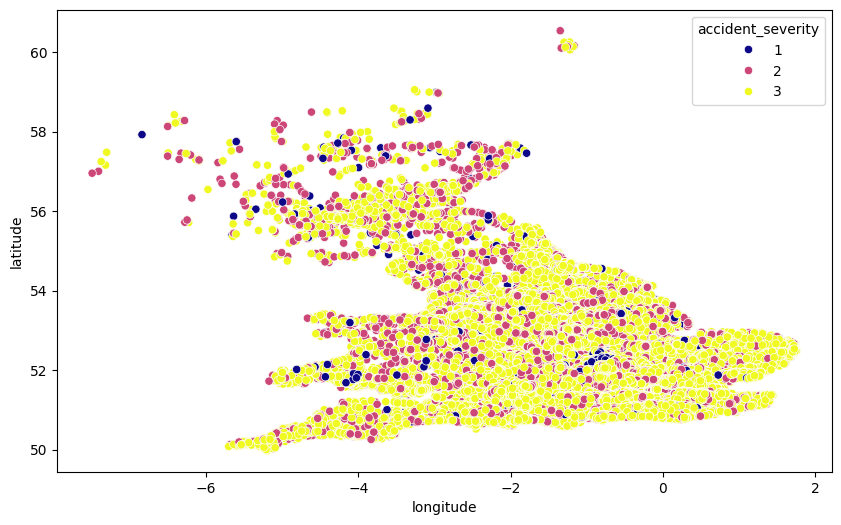

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=accident_2020_df, x = "longitude", y = "latitude", hue = "accident_severity", palette = "plasma");

Insight:

The scatter plot reveals a significant concentration of accidents in specific longitudinal areas, with a notable prevalence of both serious and slight accidents. This suggests that certain regions along this longitudinal span are more prone to accidents, particularly those with varying degrees of severity.

The fact that both serious and slight accidents are common in these areas highlights the need for targeted safety interventions. The higher incidence of serious accidents in these longitudinal zones points to potentially hazardous conditions or increased traffic volume, which could be exacerbating the severity of accidents.

There will be need to Implement focused road safety measures in these high-incident areas, such as improved signage, traffic control systems, and road maintenance

In [18]:
import plotly.express as px
# Use plotly express to create figure
plt.figure(figsize=(15, 6))
fig = px.scatter_mapbox(
    accident_2020_df,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    center={"lat":54.52738, "lon": -2.298133},  # Map will be centered on Great Britain
    width=700,  # Width of map
    height=700,  # Height of map
    hover_data=["accident_severity"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

<Figure size 1500x600 with 0 Axes>

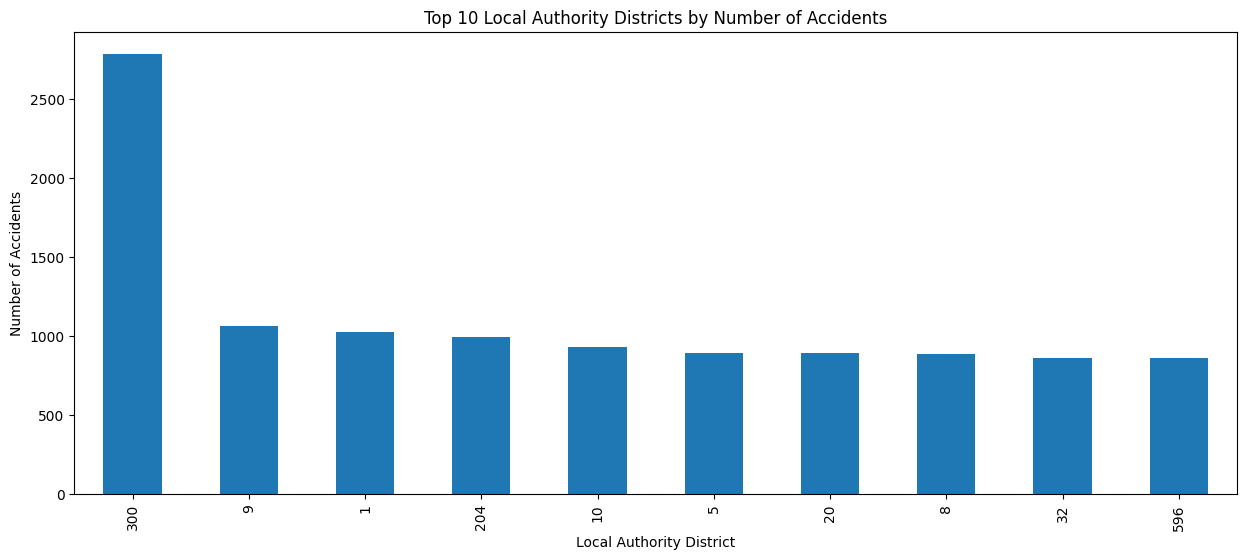

In [19]:
# Top 10 local authority districts
top_districts = accident_2020_df['local_authority_district'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
top_districts.plot(kind='bar')
plt.title('Top 10 Local Authority Districts by Number of Accidents')
plt.xlabel('Local Authority District')
plt.ylabel('Number of Accidents')
plt.show()



Insight

The data shows that one local authority district, with 300 accidents, stands out significantly compared to others with more uniform and lower counts. This suggests that the district may face unique challenges contributing to its high accident rates. To address this, targeted safety measures, a detailed analysis of traffic patterns and road conditions, and increased community engagement are recommended to reduce accident rates and improve road safety.

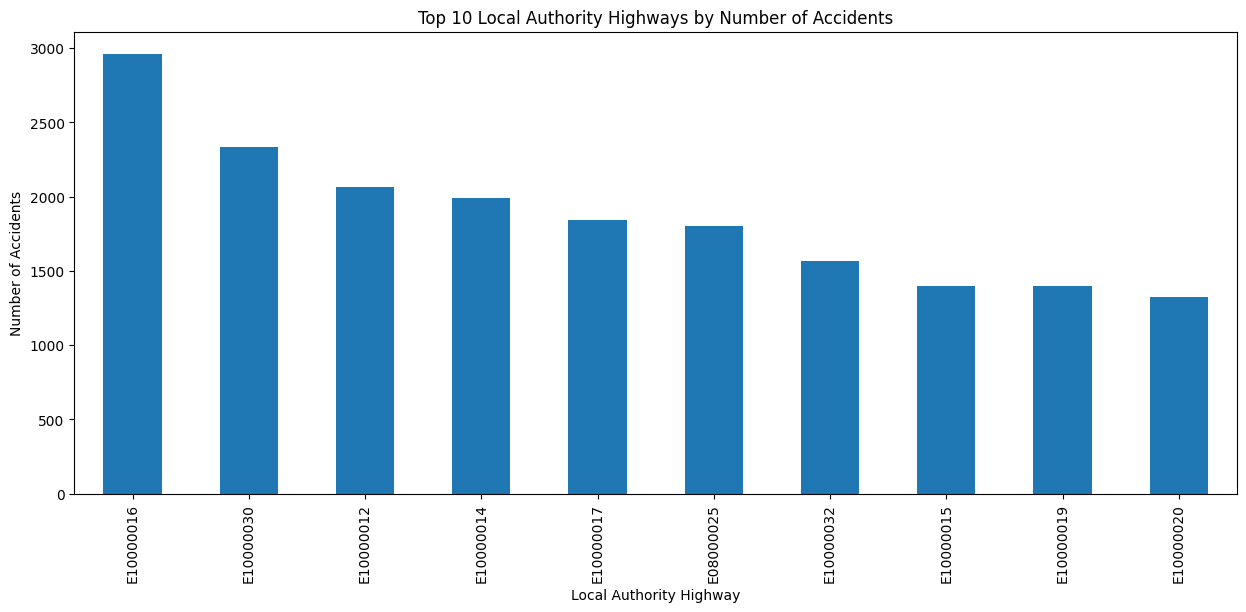

In [20]:
# Top 10 local authority highways
top_highways = accident_2020_df['local_authority_highway'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
top_highways.plot(kind='bar')
plt.title('Top 10 Local Authority Highways by Number of Accidents')
plt.xlabel('Local Authority Highway')
plt.ylabel('Number of Accidents')
plt.show()

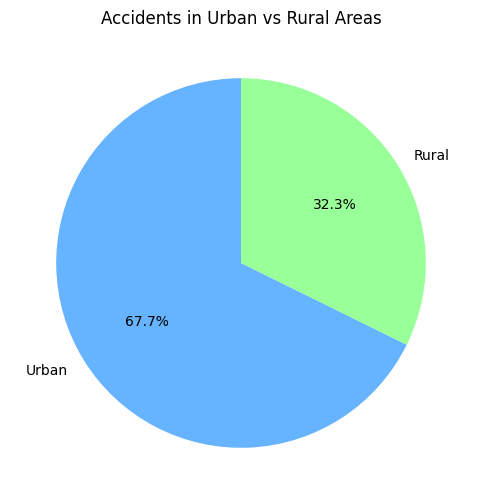

In [21]:
import matplotlib.pyplot as plt

# Create a pie chart for urban vs rural areas
plt.figure(figsize=(8, 6))
urban_rural_counts = accident_2020_df['urban_or_rural_area'].value_counts()
urban_rural_counts.index = ['Urban', 'Rural']  # Adjust the index to show the correct labels
urban_rural_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

plt.title('Accidents in Urban vs Rural Areas')
plt.ylabel('')  # Hide the y-label for better appearance
plt.show()


Urban areas: 67.7%

Rural areas: 32.3%

Insight:

The distribution of accidents reveals that a significant majority, 67.7%, occur in urban areas, while 32.3% happen in rural areas. This disparity highlights that urban environments, where traffic density is typically higher and road conditions more complex, are more prone to accidents. The higher accident rate in urban areas underscores the need for targeted road safety measures in cities, such as improved traffic management, enhanced pedestrian infrastructure, and increased public awareness. Meanwhile, although rural areas have fewer accidents proportionally, it is still essential to address safety concerns specific to these areas, such as road maintenance and visibility improvements. Tailoring safety interventions to the unique characteristics of urban and rural areas can contribute to more effective overall road safety strategies.

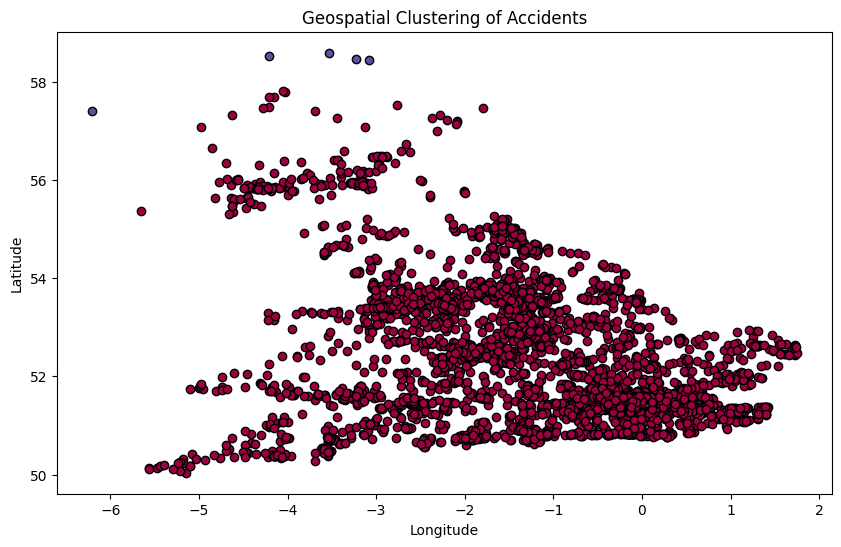

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Sample a subset of the data to prevent memory issues
df_sample = accident_2020_df.sample(n=5000, random_state=42)

# Prepare data for clustering
coords = df_sample[['latitude', 'longitude']].values

# Apply DBSCAN
db = DBSCAN(eps=0.01, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
labels = db.labels_

# Add cluster labels to the DataFrame
df_sample['cluster'] = labels

# Plot clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = coords[class_member_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
plt.title('Geospatial Clustering of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



The visualization reveals a significant concentration of accidents in specific longitudinal areas. This indicates that certain regions along these longitudinal spans are more prone to accidents, with noticeable patterns in the distribution.

The clustering of accidents in particular longitudinal zones suggests that these areas may be experiencing unique challenges, such as high traffic volume, challenging road conditions, or other environmental factors. The fact that accidents are prevalent in these specific longitudinal areas highlights the need for targeted safety interventions.

Implementing focused road safety measures in these high-incident regions, such as improved signage, traffic control systems, and road maintenance, could address the underlying issues contributing to the high concentration of accidents. This targeted approach can help mitigate risks and enhance road safety in these critical areas

In [23]:
# Create a dictionary to map numeric values to descriptive labels for accident severity
accident_severity_map = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

# Apply the mapping to the 'accident_severity' column
accident_2020_df['accident_severity'] = accident_2020_df['accident_severity'].map(accident_severity_map)

# **Analysis of Accident Severity**

<ipython-input-24-4c2347a3b3e1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




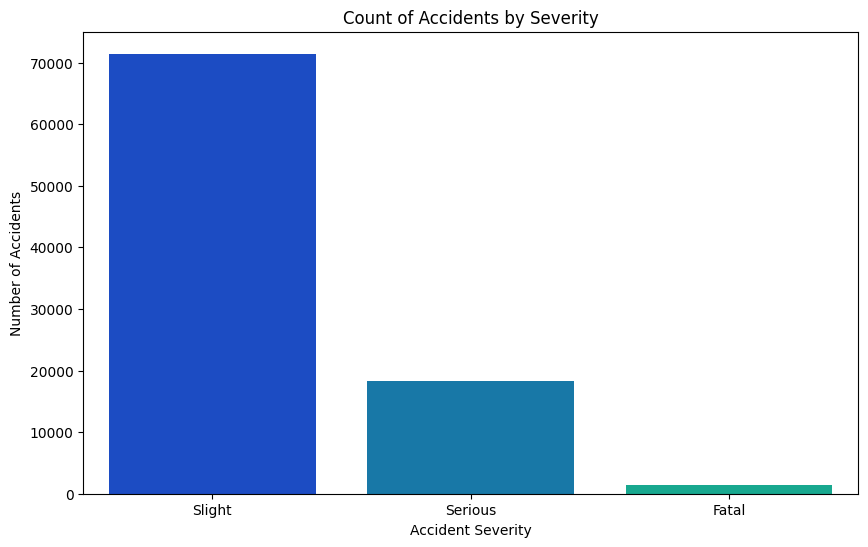

In [24]:
# Plotting count plot for accident_severity
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_2020_df, x='accident_severity', palette='winter')
plt.title('Count of Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

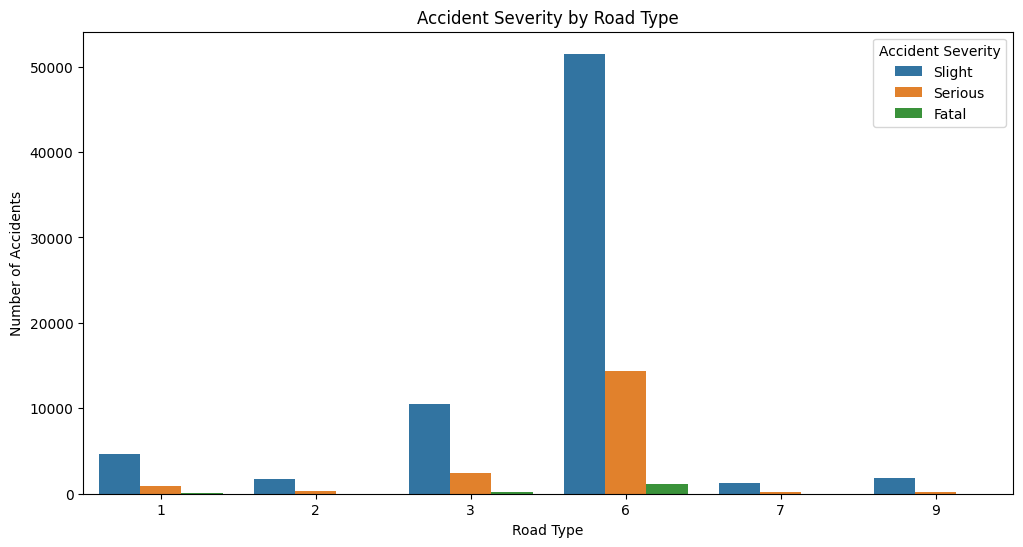

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='road_type', hue='accident_severity')
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()


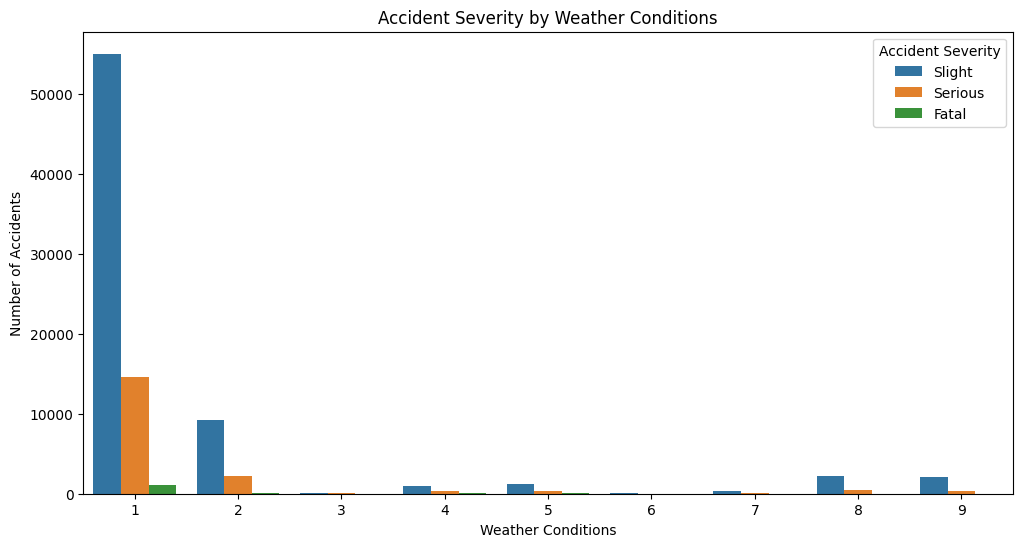

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='weather_conditions', hue='accident_severity')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()

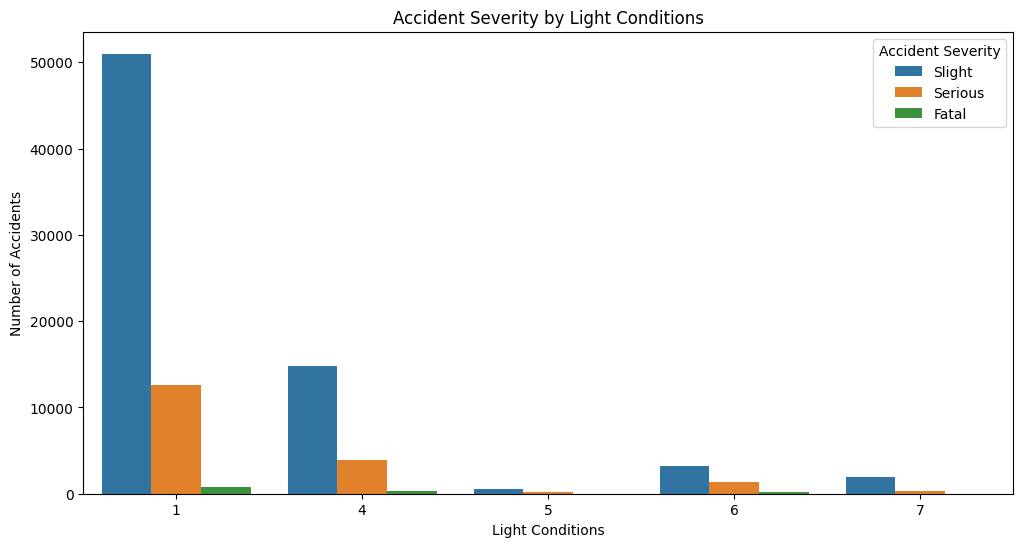

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='light_conditions', hue='accident_severity')
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()


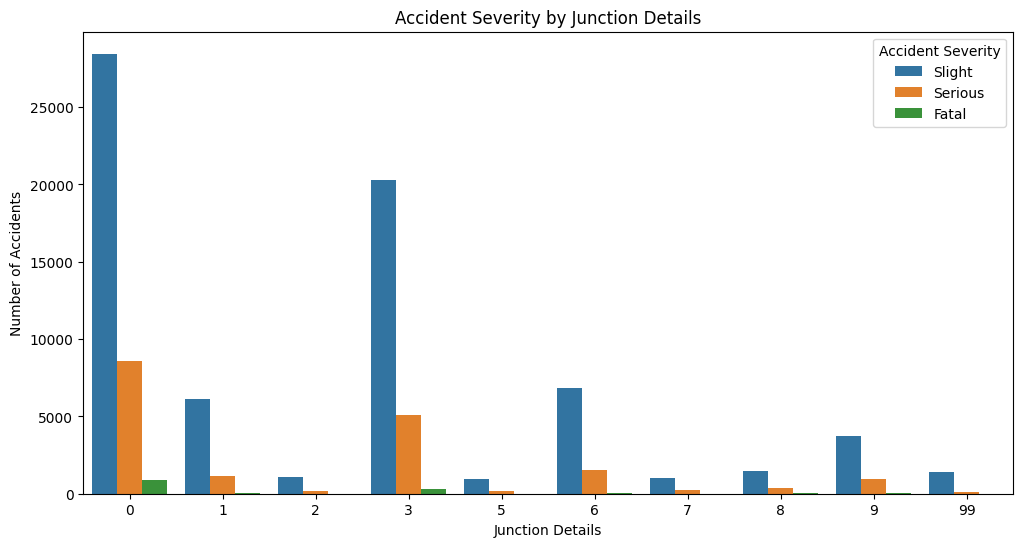

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='junction_detail', hue='accident_severity')
plt.title('Accident Severity by Junction Details')
plt.xlabel('Junction Details')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()


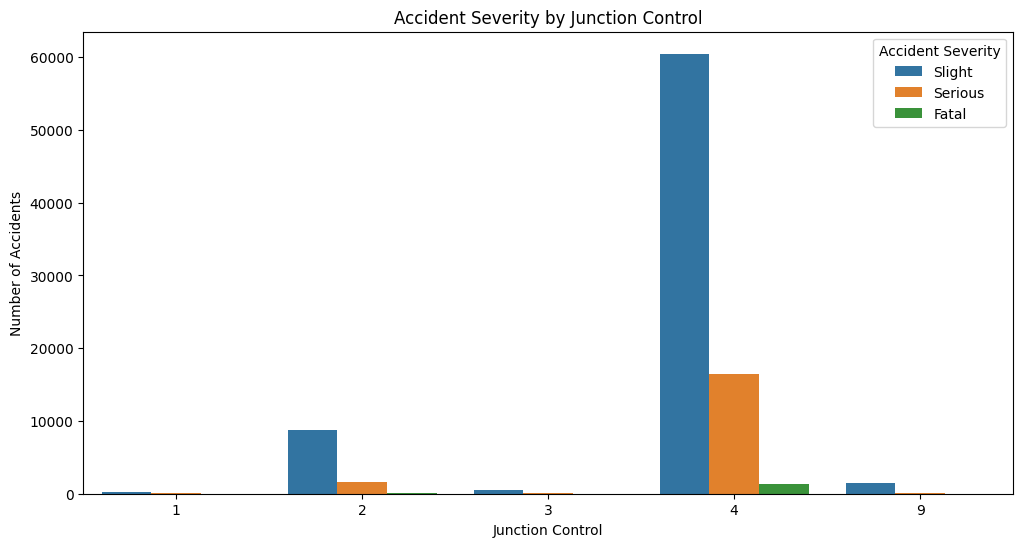

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='junction_control', hue='accident_severity')
plt.title('Accident Severity by Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()

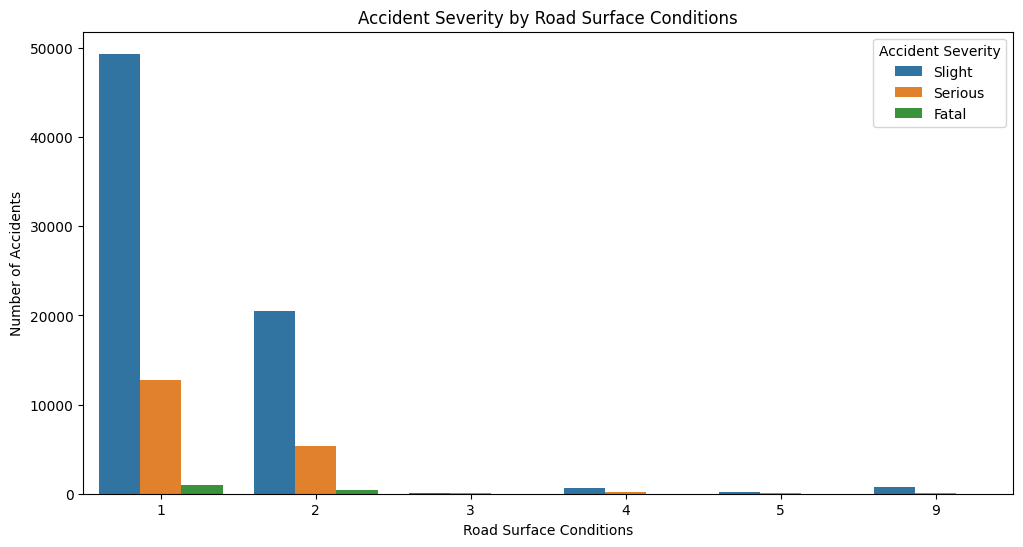

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='road_surface_conditions', hue='accident_severity')
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()

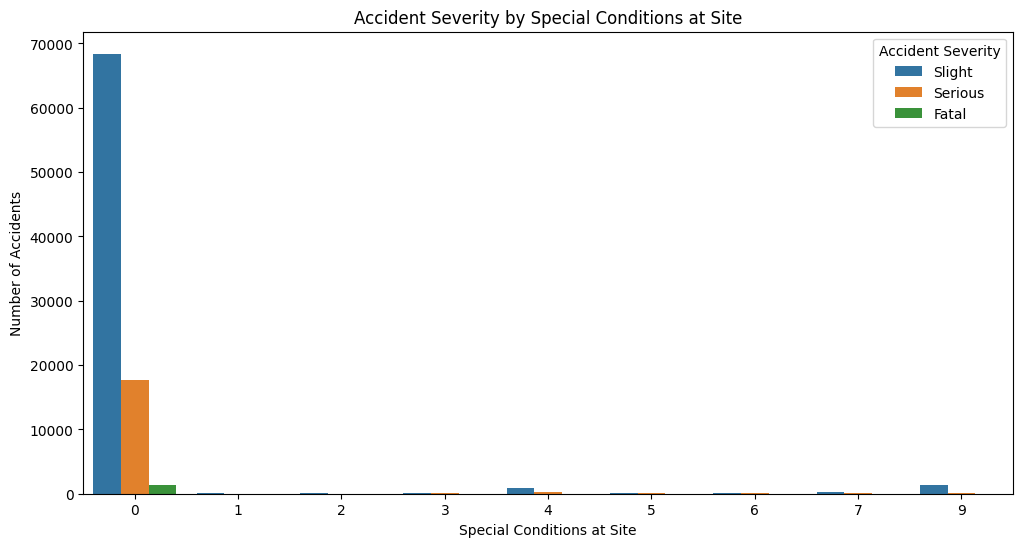

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='special_conditions_at_site', hue='accident_severity')
plt.title('Accident Severity by Special Conditions at Site')
plt.xlabel('Special Conditions at Site')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()


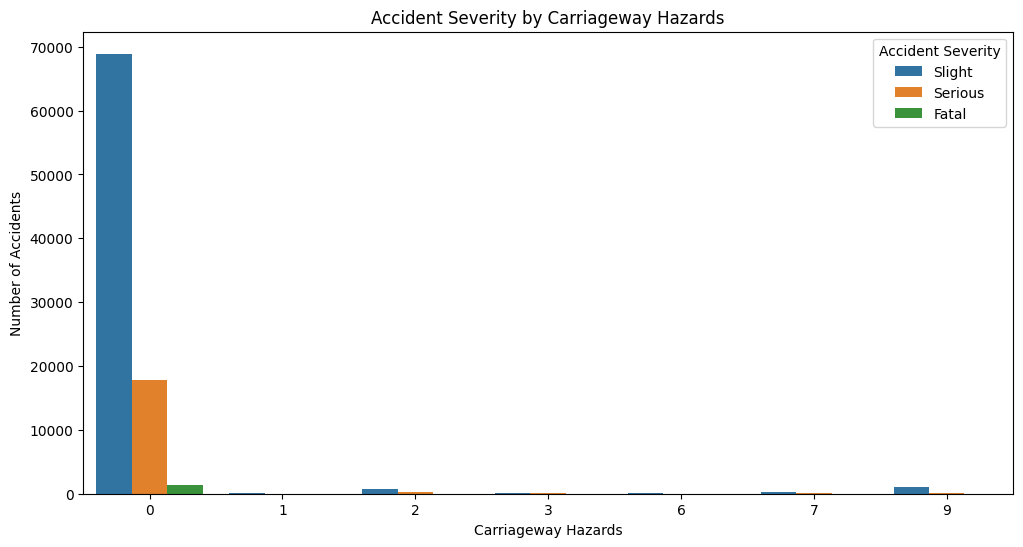

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accident_2020_df, x='carriageway_hazards', hue='accident_severity')
plt.title('Accident Severity by Carriageway Hazards')
plt.xlabel('Carriageway Hazards')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()
